# Load Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Allows charts to appear in the notebook
%matplotlib inline

# Load Dataset 

In [24]:
path = "./heart_disease/"

In [25]:
# data source: UCI
# https://archive.ics.uci.edu/ml/datasets.php
data = pd.read_csv(path + "heart.csv")

# Check Data for any missing values

In [99]:
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [27]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
data['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

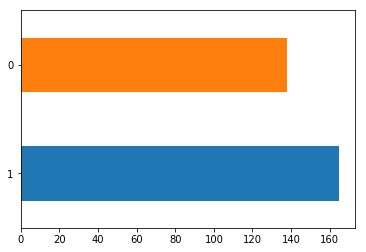

In [29]:
data.target.value_counts().plot(kind = 'barh')

In [30]:
#Get Target data 
y = data['target']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['target'], axis = 1)

In [98]:
print(f'X : {X.shape}')
print(f'y : {y.shape}')

X : (303, 13)
y : (303,)


# Divide Data into Train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [32]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (242, 13)
y_train : (242,)
X_test : (61, 13)
y_test : (61,)


# Build Basic Random Forest Model

In [33]:
rf_Model = RandomForestClassifier()

- In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

- Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features.

- The purpose of these two sources of randomness is to **decrease the variance of the forest estimator**. (High-dimensional data!)

- Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. 

- Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

# Check Accuracy

In [35]:
print (f'Train Accuracy - : {rf_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.852


# Prediction

In [76]:
# fit the model
rf_Model.fit(X_train, y_train)

# Create a function to guess when a recipe is a muffin or a cupcake
def heartdisease(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    if(rf_Model.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))==1:
        print('You have heart disease!')
    else:
        print('You\'re fine!')

In [77]:
heartdisease(63,1,3,145,233,1,0,150,0,2.3,0,0,1)

You have heart disease!


In [78]:
heartdisease(56,0,1,130,236,0,0,174,0,0.0,1,1,2)

You're fine!


In [79]:
heartdisease(58,0,1,130,236,0,0,174,0,0.0,1,1,2)

You're fine!


# Build Random Forest Model with hyperparameters

In [88]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [89]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [20, 26, 33, 40, 46, 53, 60, 66, 73, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [90]:
rf_Model = RandomForestClassifier()


- **GridSearch**
    - Exhaustive search over specified parameter values for an estimator.
    - Important members are fit, predict.
    - GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
    - The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
    - details: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- cv is cross-validation, 
    - here I use 3 fold cross validation 
    - for more info, please see: https://machinelearningmastery.com/k-fold-cross-validation/

- n_jobs = int, default=None
    - Number of jobs to run in parallel. 
    - None means 1 unless in a joblib.parallel_backend context. 
    - -1 means using all processors.

- verboseinteger
    - Controls the verbosity: the higher, the more messages.

In [91]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 6)

In [92]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 210 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 616 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 1182 tasks      | elapsed:   44.9s
[Parallel(n_jobs=6)]: Done 1920 out of 1920 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 26, 33, 40, 46, 53, 60, 66, 73,
                                          80]},
             verbose=2)

In [93]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

# Check Accuracy Again

In [51]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')


Train Accuracy - : 0.864
Test Accuracy - : 0.836


# Prediction

In [94]:
# Create a function to guess when a recipe is a muffin or a cupcake
def heartdisease1(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    if(rf_Grid.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))==1:
        print('You have heart disease!')
    else:
        print('You\'re fine!')

In [95]:
heartdisease1(63,1,3,145,233,1,0,150,0,2.3,0,0,1)

You have heart disease!


In [96]:
heartdisease1(58,0,1,130,236,0,0,174,0,0.0,1,1,2)

You have heart disease!


In [97]:
heartdisease(56,0,1,130,236,0,0,174,0,0.0,1,1,2)

You have heart disease!
